In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install citipy
# Add Citipy module
from citipy import citipy

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitude and longitude to a list.
coordinates = list(lat_lngs)

In [17]:
# Create a list for holding cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm suffienct count.
len(cities)

614

In [18]:
# Import the time library and the datetime module from the datetime library. 
import time
from datetime import datetime

In [21]:
# Import the request library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create an endpoint URL for each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | kodiak
Processing Record 2 of set 1 | avarua
Processing Record 3 of set 1 | hermanus
Processing Record 4 of set 1 | tautira
Processing Record 5 of set 1 | busselton
Processing Record 6 of set 1 | kapit
Processing Record 7 of set 1 | saldanha
Processing Record 8 of set 1 | klaksvik
Processing Record 9 of set 1 | pevek
Processing Record 10 of set 1 | vaini
Processing Record 11 of set 1 | hobart
Processing Record 12 of set 1 | paramonga
Processing Record 13 of set 1 | grindavik
Processing Record 14 of set 1 | wamba
Processing Record 15 of set 1 | mount gambier
Processing Record 16 of set 1 | conde
Processing Record 17 of set 1 | yellowknife
Processing Record 18 of set 1 | hithadhoo
Processing Record 19 of set 1 | chuy
Processing Record 20 of set 1 | atuona
Processing Record 21 of set 1 | saint anthony
Processing Record 22 of set 1 | tsihombe
City not found. Skipping...
Processing Record 23 of set 1 

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)

555


In [27]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,38.71,93,100,20.71,US,2022-01-21 03:35:36
1,Avarua,-21.2078,-159.7750,78.85,94,75,17.27,CK,2022-01-21 03:30:38
2,Hermanus,-34.4187,19.2345,59.90,90,2,10.33,ZA,2022-01-21 03:35:37
3,Tautira,-17.7333,-149.1500,84.00,81,100,17.87,PF,2022-01-21 03:35:37
4,Busselton,-33.6500,115.3333,104.04,24,2,7.76,AU,2022-01-21 03:35:38
5,Kapit,2.0167,112.9333,82.36,75,100,1.19,MY,2022-01-21 03:35:38
6,Saldanha,-33.0117,17.9442,57.25,87,0,12.01,ZA,2022-01-21 03:35:39
7,Klaksvik,62.2266,-6.5890,45.52,79,100,24.94,FO,2022-01-21 03:35:39
8,Pevek,69.7008,170.3133,-34.26,96,17,0.58,RU,2022-01-21 03:35:39
9,Vaini,-21.2000,-175.2000,81.81,78,39,16.96,TO,2022-01-21 03:35:40


In [28]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [29]:
city_data_df = city_data_df[new_column_order]

In [30]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-01-21 03:35:36,57.7900,-152.4072,38.71,93,100,20.71
1,Avarua,CK,2022-01-21 03:30:38,-21.2078,-159.7750,78.85,94,75,17.27
2,Hermanus,ZA,2022-01-21 03:35:37,-34.4187,19.2345,59.90,90,2,10.33
3,Tautira,PF,2022-01-21 03:35:37,-17.7333,-149.1500,84.00,81,100,17.87
4,Busselton,AU,2022-01-21 03:35:38,-33.6500,115.3333,104.04,24,2,7.76
5,Kapit,MY,2022-01-21 03:35:38,2.0167,112.9333,82.36,75,100,1.19
6,Saldanha,ZA,2022-01-21 03:35:39,-33.0117,17.9442,57.25,87,0,12.01
7,Klaksvik,FO,2022-01-21 03:35:39,62.2266,-6.5890,45.52,79,100,24.94
8,Pevek,RU,2022-01-21 03:35:39,69.7008,170.3133,-34.26,96,17,0.58
9,Vaini,TO,2022-01-21 03:35:40,-21.2000,-175.2000,81.81,78,39,16.96


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

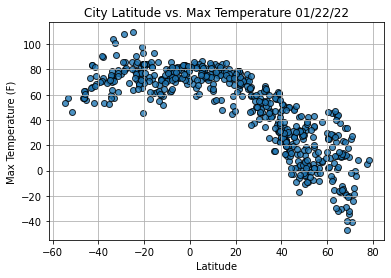

In [41]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

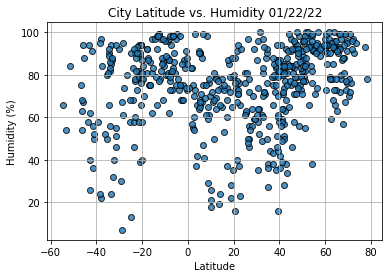

In [42]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

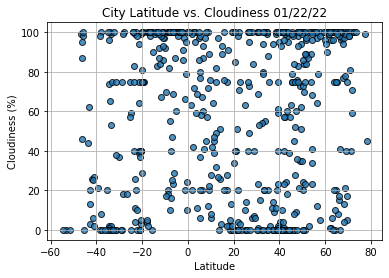

In [43]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()